In [5]:
import zipfile
import os

zip_file = '/teamspace/uploads/Images.zip'  # Path to the zip file
unzip_dir = 'tempfile'  # New directory where you want to extract files

# Create the directory if it doesn't exist
os.makedirs(unzip_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

print("Files unzipped successfully!")


Files unzipped successfully!


In [ ]:
nstall Required Libraries

In [6]:
# Install Required Libraries



pip install tensorflow scikit-learn matplotlib -U git+https://github.com/qubvel/efficientnet

  Cloning https://github.com/qubvel/efficientnet to /tmp/pip-req-build-eta2b8t1
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/efficientnet /tmp/pip-req-build-eta2b8t1

  Resolved https://github.com/qubvel/efficientnet to commit f7f3e736c113b872caf53dae9fbbda996a8eb87d
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 153.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 184.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 203.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 194.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 153.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 207.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 175.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 165.3 MB/s eta 0:00:00
   ━━━━━━━━━━━

In [7]:
# Import Libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


2025-01-27 09:14:21.776952: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737969261.812801    5181 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737969261.822765    5181 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-27 09:14:21.903111: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# Set Dataset Paths and Set Image Size and Hyperparameters

import os
import matplotlib.pyplot as plt

base_dir = 'tempfile/Images'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')


image_size = (300, 300) # efficienetB3



batch_size = 32
LEARNING_RATE=0.0001
num_classes=6
epochs = 10


Found 3125 images belonging to 6 classes.
Found 778 images belonging to 6 classes.
Found 977 images belonging to 6 classes.


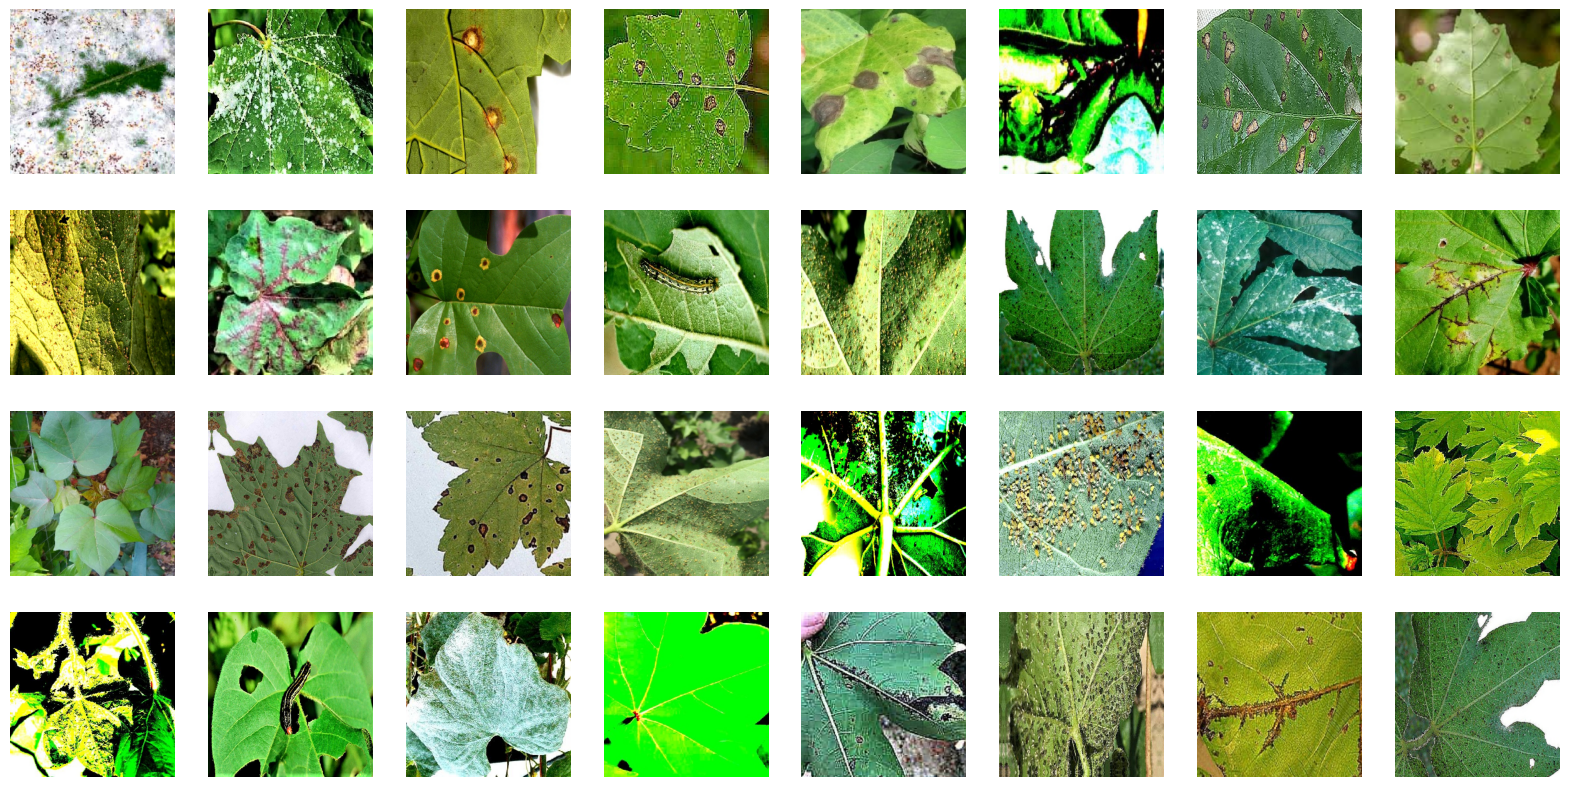

In [9]:
# Define Data Generators and  Visualize Preprocessed Images
trdata=tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False, samplewise_center=False,
    featurewise_std_normalization=False, samplewise_std_normalization=False,
    rotation_range=0, width_shift_range=0.0, height_shift_range=0.0,
    brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0,
    horizontal_flip=False, vertical_flip=False,
    validation_split=0.2, rescale=1./255
)

train_ds = trdata.flow_from_directory(
    directory=train_dir,
    target_size=image_size,
    class_mode="categorical",
    subset="training",
    batch_size=batch_size,
    shuffle=True,
)

val_ds = trdata.flow_from_directory(
    directory=train_dir,
    target_size=image_size,
    class_mode="categorical",
    subset="validation",
    batch_size=batch_size,
    shuffle=True,
)

testdata=tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False, samplewise_center=False,
    featurewise_std_normalization=False, samplewise_std_normalization=False,
    rotation_range=0, width_shift_range=0.0, height_shift_range=0.0,
    brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0,
    horizontal_flip=False, vertical_flip=False, rescale=1./255
)

test_ds = testdata.flow_from_directory(
    directory=test_dir,
    target_size=image_size,
    class_mode="categorical",
    batch_size=batch_size,
    shuffle=False,
)

x_batch, y_batch = next(train_ds)

_, axs = plt.subplots(4, 8, figsize=(20, 10))
axs = axs.flatten()
for i, ax in zip(range(0, 32), axs):
    image = x_batch[i]
    ax.axis("off")
    ax.imshow(image)

plt.savefig("preprocessed.png")
plt.show()

In [10]:
 # Load Base Model

from keras import layers
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import MobileNetV2

from keras import optimizers


base_model = EfficientNetB3(include_top=False, input_shape=input_shapes, pooling='avg', weights="imagenet",classes=num_classes)

# Build Custom Classification Model
x = base_model.output

x = BatchNormalization()(x)

x = Dense(512,activation='sigmoid')(x)    
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  

x = Dense(128,activation='sigmoid')(x)  
x = Dropout(0.7)(x)  

predictions = Dense(num_classes, activation="softmax")(x)

model= Model(inputs = base_model.input, outputs = predictions)

# Compile and Save Model

model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=LEARNING_RATE),metrics=['acc'])
model.summary()
model.save('model_base.h5')

W0000 00:00:1737969442.287947    5181 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 300, 300,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 300, 300,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 300, 300,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 301, 301,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 150, 150,  │      1,080 │ stem_conv_pad[0]… │
│                     │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 150, 150,  │        160 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 150, 150,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 150, 150,  │        360 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 150, 150,  │        160 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 150, 150,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 40)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 40)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 10)  │        410 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 40)  │        440 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 150, 150,  │          0 │ block1a_activati… │
│ (Multiply)          │ 40)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 150, 150,  │        960 │ block1a_se_excit

 Total params: 11,645,621 (44.42 MB)

 Trainable params: 11,553,966 (44.07 MB)

 Non-trainable params: 91,655 (358.03 KB)

In [11]:
# Set Callbacks and Train Model

from keras.callbacks import ModelCheckpoint,EarlyStopping

checkpoint = ModelCheckpoint('effB3.keras', monitor='val_acc',save_best_only=True,)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
history=model.fit(train_ds, epochs=epochs, callbacks=[checkpoint,early], validation_data=val_ds)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 766s 7s/step - acc: 0.3571 - loss: 2.5671 - val_acc: 0.1684 - val_loss: 1.8647
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 724s 7s/step - acc: 0.7984 - loss: 0.6338 - val_acc: 0.2044 - val_loss: 1.7704
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 722s 7s/step - acc: 0.8997 - loss: 0.3016 - val_acc: 0.4859 - val_loss: 1.2683
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 725s 7s/step - acc: 0.9360 - loss: 0.1865 - val_acc: 0.8033 - val_loss: 0.5823
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 735s 8s/step - acc: 0.9601 - loss: 0.1171 - val_acc: 0.8535 - val_loss: 0.4798
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 720s 7s/step - acc: 0.9716 - loss: 0.0947 - val_acc: 0.8432 - val_loss: 0.4955
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 706s 7s/step - acc: 0.9775 - loss: 0.0673 - val_acc: 0.8856 - val_loss: 0.3574
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 715s 7s/step - acc: 0.9793 - loss: 0.0626 - val_acc: 0.9936 - val_loss: 0.0236
Epoch 9/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 725s 7s/step - acc: 0.9822

31/31 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step
Confusion matrix, without normalization
[[162   0   1   0   0   1]
 [  2 160   0   0   0   0]
 [  2   0 151   0   1   6]
 [  0   0   0 165   0   0]
 [  1   0   2   0 162   1]
 [  1   0   1   4   0 154]]


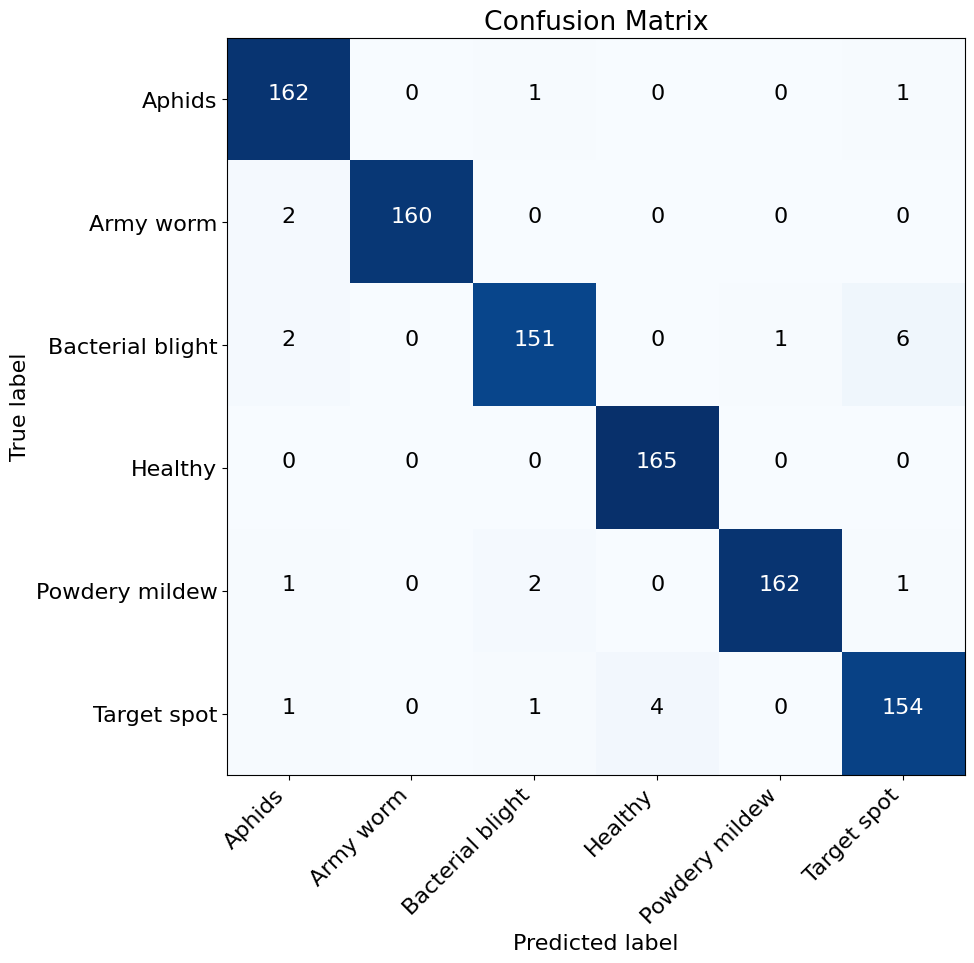


Classification Report:

                  precision    recall  f1-score   support

          Aphids     0.9643    0.9878    0.9759       164
       Army worm     1.0000    0.9877    0.9938       162
Bacterial blight     0.9742    0.9437    0.9587       160
         Healthy     0.9763    1.0000    0.9880       165
  Powdery mildew     0.9939    0.9759    0.9848       166
     Target spot     0.9506    0.9625    0.9565       160

        accuracy                         0.9765       977
       macro avg     0.9765    0.9763    0.9763       977
    weighted avg     0.9767    0.9765    0.9764       977



In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import load_model

# Load model weights
model.load_weights('effB3.keras')

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, ha="right")
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig('cnf_B3.jpg')

# Get class labels
class_labels = test_ds.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

# Predict on the test dataset using `predict`
Y_pred = model.predict(test_ds)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion matrix
cnf_matrix = confusion_matrix(test_ds.classes, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(cnf_matrix, classes=classes, title='Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:\n")
print(classification_report(test_ds.classes, y_pred, target_names=classes, digits=4))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


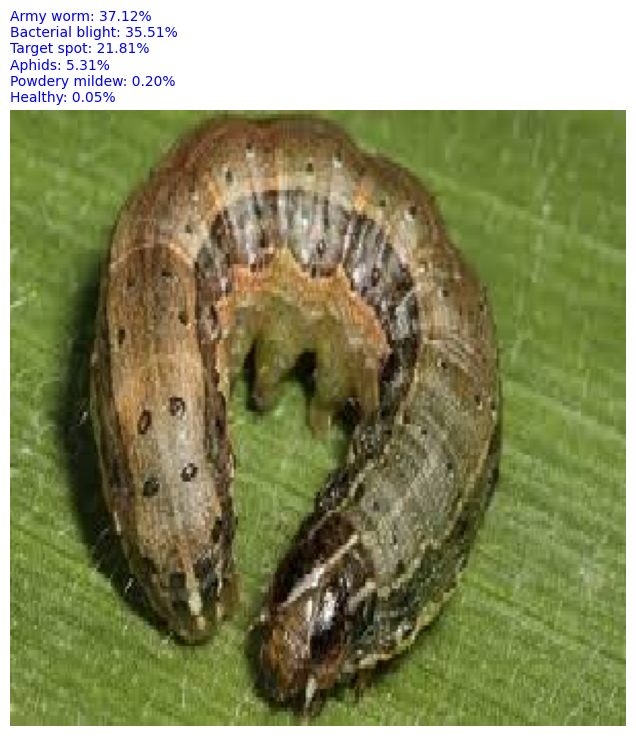

In [22]:
# predict and display image with probabilities

from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_and_display_image_with_probabilities(img_path, model, image_size=(300, 300)):
    # Load the image with target size
    img = image.load_img(img_path, target_size=image_size)
    
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    
    # Rescale the image
    img_array = img_array / 255.0
    
    # Add an extra dimension for the batch size (model expects a batch)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict the class probabilities
    predictions = model.predict(img_array)
    
    # Get the class labels
    class_labels = {0: 'Aphids', 1: 'Army worm', 2: 'Bacterial blight', 3: 'Healthy', 4: 'Powdery mildew', 5: 'Target spot'}
    
    # Format the probabilities for all classes
    probabilities = {class_labels[i]: predictions[0][i] for i in range(len(class_labels))}
    
    # Sort probabilities in descending order
    sorted_probabilities = sorted(probabilities.items(), key=lambda x: x[1], reverse=True)
    
    # Display the image
    plt.figure(figsize=(8, 8))
    plt.imshow(image.img_to_array(img) / 255.0)  # Display the original image
    plt.axis('off')  # Hide axes
    
    # Add text with predictions and probabilities
    title_text = "\n".join([f"{label}: {prob:.2%}" for label, prob in sorted_probabilities])
    plt.title(title_text, fontsize=10, color='blue', loc='left')
    
    # Save the image with prediction text
    plt.savefig("predicted_image_with_probabilities.png", bbox_inches='tight')
    plt.show()

# Example usage
img_path = "army.jpeg"  # Replace with your image path
predict_and_display_image_with_probabilities(img_path, model)
